<a href="https://colab.research.google.com/github/rodriquiel/concrete_images_classifier/blob/main/evaluacion_modified_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluacion modelos VGG16 y  ResNet50 medificados

En esta parte, se evalua el modelo de aprendizaje profundo utilizando los datos de prueba de la siguiente manera:
1. Se carga los modelos creados a partir del modelo ResNet50 y VGG16.
2. Se construye un ImageDataGenerator para el conjunto de datos de prueba, al cual se le pasa el directorio de imagenes de prueba, el tamaño y el parametro 'shuffle' en False.
3. Se utiliza el metodo 'evaluate_generator' para evaluar los datos de prueba en el modelo, pasando el ImageDataGenerator como parametro.
4. Por ultimo, se imprime los rendimientos de los clasificadores utilizando el modelo preentrenado VGG16 y ResNet.


Luego, se utilizan los modelos para predecir si las imagenes correspondientes al lote de prueba se tratan de hormigon agrietado o no-

Se utiliza el metodo 'predict_generator' para predecir la clase de las imagenes en los datos de prueba, pasando la instancia de datos de prueba ImageDataGenerator definida en la parte anterior como argumento.

### Importacion librerias y paquetes

In [ ]:
!pip install keras
!pip install skillsnetwork
!pip install tensorflow

                                              0.0/1.1 MB ? eta -:--:--
                                              0.0/1.1 MB ? eta -:--:--
     -                                        0.0/1.1 MB 640.0 kB/s eta 0:00:02
     --                                       0.1/1.1 MB 465.5 kB/s eta 0:00:03
     --                                       0.1/1.1 MB 435.7 kB/s eta 0:00:03
     ---                                      0.1/1.1 MB 476.3 kB/s eta 0:00:03
     ---                                      0.1/1.1 MB 435.7 kB/s eta 0:00:03
     ----                                     0.1/1.1 MB 423.5 kB/s eta 0:00:03
     -----                                    0.1/1.1 MB 405.9 kB/s eta 0:00:03
     -----                                    0.2/1.1 MB 382.3 kB/s eta 0:00:03
     ------                                   0.2/1.1 MB 388.2 kB/s eta 0:00:03
     -------                                  0.2/1.1 MB 401.2 kB/s eta 0:00:03
     -------                                  0.2/1.1 MB 4


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/139.8 kB ? eta -:--:--
                                              0.0/139.8 kB ? eta -:--:--
     --                                       10.2/139.8 kB ? eta -:--:--
     --------                              30.7/139.8 kB 435.7 kB/s eta 0:00:01
     ----------                            41.0/139.8 kB 393.8 kB/s eta 0:00:01
     ------------------                    71.7/139.8 kB 393.8 kB/s eta 0:00:01
     ------------------                    71.7/139.8 kB 393.8 kB/s eta 0:00:01
     ------------------------              92.2/139.8 kB 374.1 kB/s eta 0:00:01
     --------------------------           102.4/139.8 kB 346.5 kB/s eta 0:00:01
     -------------------------------      122.9/139.8 kB 343.4 kB/s eta 0:00:01
     ------------------------------------ 139.8/139.8 kB 360.8 kB/s eta 0:00:00
                                              0.0/64.9 kB ? eta -:--:--
                                              0.0/64.9 kB ? eta -:--


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install skillsnetwork

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 6.2 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 55.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.8
    Uninstalling widgetsnbextension-3.6.8:
      Successfully uninstalled widgetsnbextension-3.6.8
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
import numpy as np
import keras
import skillsnetwork
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.models import load_model
import matplotlib.pyplot as plt

## Descarga de Datos

Data: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

In [ ]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

--2024-08-28 20:37:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261483817 (249M) [application/zip]
Saving to: ‘concrete_data_week4.zip’

concrete_data_week4 100%[===================>] 249.37M  27.0MB/s    in 8.9s    

2024-08-28 20:37:48 (27.9 MB/s) - ‘concrete_data_week4.zip’ saved [261483817/261483817]



In [ ]:
!unzip concrete_data_week4.zip


Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: __MACOSX/concrete_data_week4/train/negative/._06818.jpg  
  inflating: concrete_data_week4/train/negative/08835.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._08835.jpg  
  inflating: concrete_data_week4/train/negative/08821.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._08821.jpg  
  inflating: concrete_data_week4/train/negative/03974.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._03974.jpg  
  inflating: concrete_data_week4/train/negative/12879.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._12879.jpg  
  inflating: concrete_data_week4/train/negative/09281.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._09281.jpg  
  inflating: concrete_data_week4/train/negative/10908.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._10908.jpg  
  inflating: concrete_data_week4/train/negative/01805.jpg  
  inflating: __M

In [ ]:
pip install --upgrade tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


## Declaracion constantes

In [ ]:
num_classes = 2
image_resize = 224
batch_size = 100

## Importacion modelos

Los modelos se encuentran dentro del repositorio del proyecto: *Aca va link repo*
Debe descargar el zip, descomprimir y subir al entorno los modelos para poder continuar con la ejecucion. El proceso puede llevar unos minutos

In [ ]:
vgg16_model = load_model('classifier_vgg16_model.keras')

In [ ]:
resnet_model = load_model('classifier_resnet_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
test_data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_generator = test_data_generator.flow_from_directory(
    'concrete_data_week4/test',
    target_size=(image_resize, image_resize),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 500 images belonging to 2 classes.


In [ ]:
# Evaluar el modelo ResNet50
resnet_eval = resnet_model.evaluate(test_generator, steps=test_generator.samples // batch_size)

print(f'ResNet50 Test Loss: {resnet_eval[0]}')
print(f'ResNet50 Test Accuracy: {resnet_eval[1]}')

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 364ms/step - accuracy: 0.9983 - loss: 0.0109
ResNet50 Test Loss: 0.014530818909406662
ResNet50 Test Accuracy: 0.9959999918937683


In [ ]:
vgg16_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Evaluar el modelo VGG16
vgg16_eval = vgg16_model.evaluate(test_generator, steps=test_generator.samples // batch_size)

print(f'VGG16 Test Loss: {vgg16_eval[0]}')
print(f'VGG16 Test Accuracy: {vgg16_eval[1]}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 416ms/step - accuracy: 0.7431 - loss: 0.6931
VGG16 Test Loss: 0.6931472420692444
VGG16 Test Accuracy: 0.5


## Predicciones

In [ ]:
vgg16_predictions = vgg16_model.predict(test_generator, steps=test_generator.samples // batch_size, verbose=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 395ms/step


In [ ]:
predicted_classes = np.argmax(vgg16_predictions, axis=1)

In [ ]:
class_labels = {v: k for k, v in test_generator.class_indices.items()}

predicted_labels = [class_labels[pred] for pred in predicted_classes[:10]]

In [ ]:
for i, label in enumerate(predicted_labels):
    print(f"Image {i+1}: {label}")

Image 1: negative
Image 2: negative
Image 3: negative
Image 4: negative
Image 5: negative
Image 6: negative
Image 7: negative
Image 8: negative
Image 9: negative
Image 10: negative


In [ ]:
batch_images, batch_labels = next(test_generator)

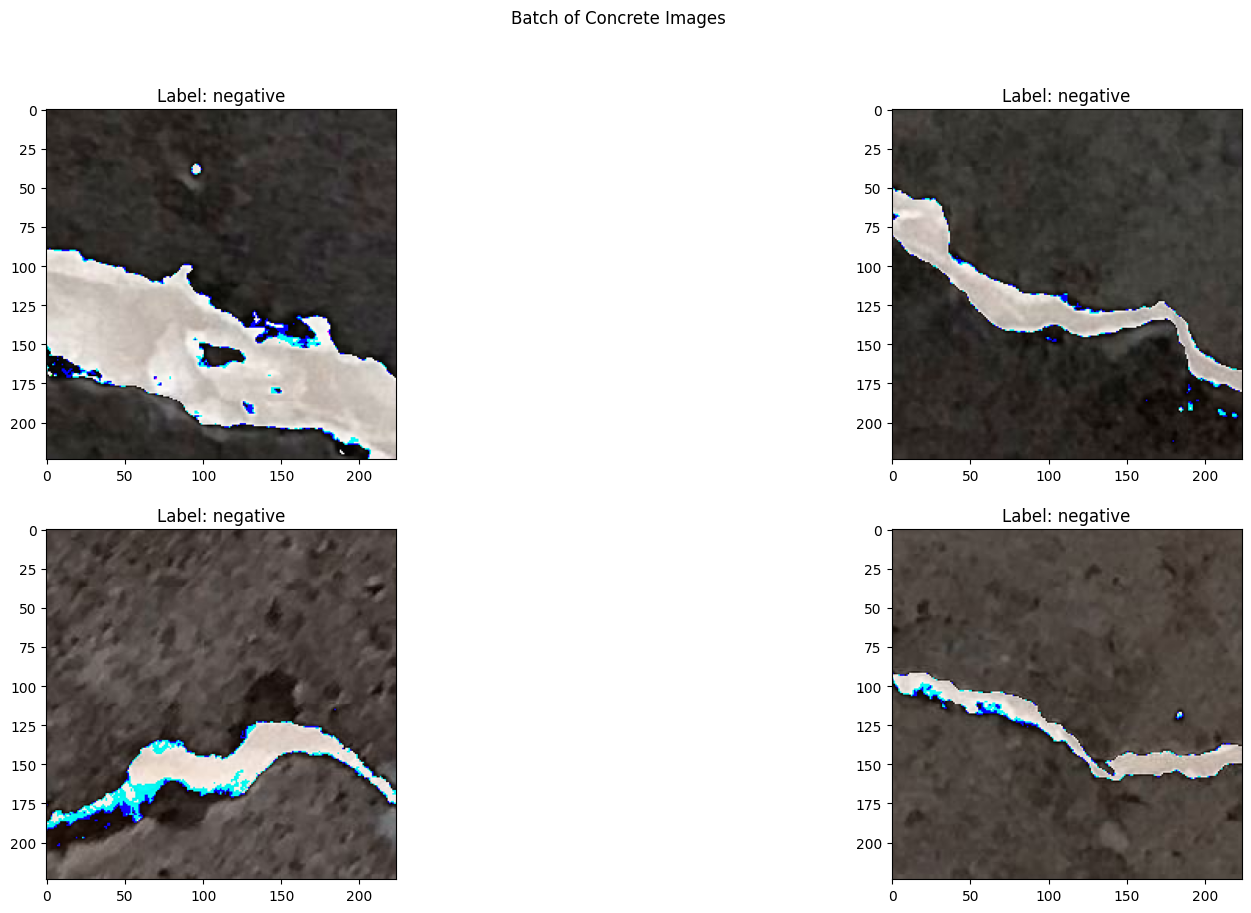

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1:
        image_data = batch_images[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ax2.set_title(f'Label: {predicted_labels[ind]}')
        ind += 1

fig.suptitle('Batch of Concrete Images')
plt.show()

In [ ]:
resnet_predictions = resnet_model.predict(test_generator, steps=test_generator.samples // batch_size, verbose=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step


In [ ]:
predicted_classes = np.argmax(resnet_predictions, axis=1)

In [ ]:
class_labels = {v: k for k, v in test_generator.class_indices.items()}

predicted_labels = [class_labels[pred] for pred in predicted_classes[:10]]

In [ ]:
for i, label in enumerate(predicted_labels):
    print(f"Image {i+1}: {label}")

Image 1: negative
Image 2: negative
Image 3: negative
Image 4: negative
Image 5: negative


In [ ]:
batch_images, batch_labels = next(test_generator)

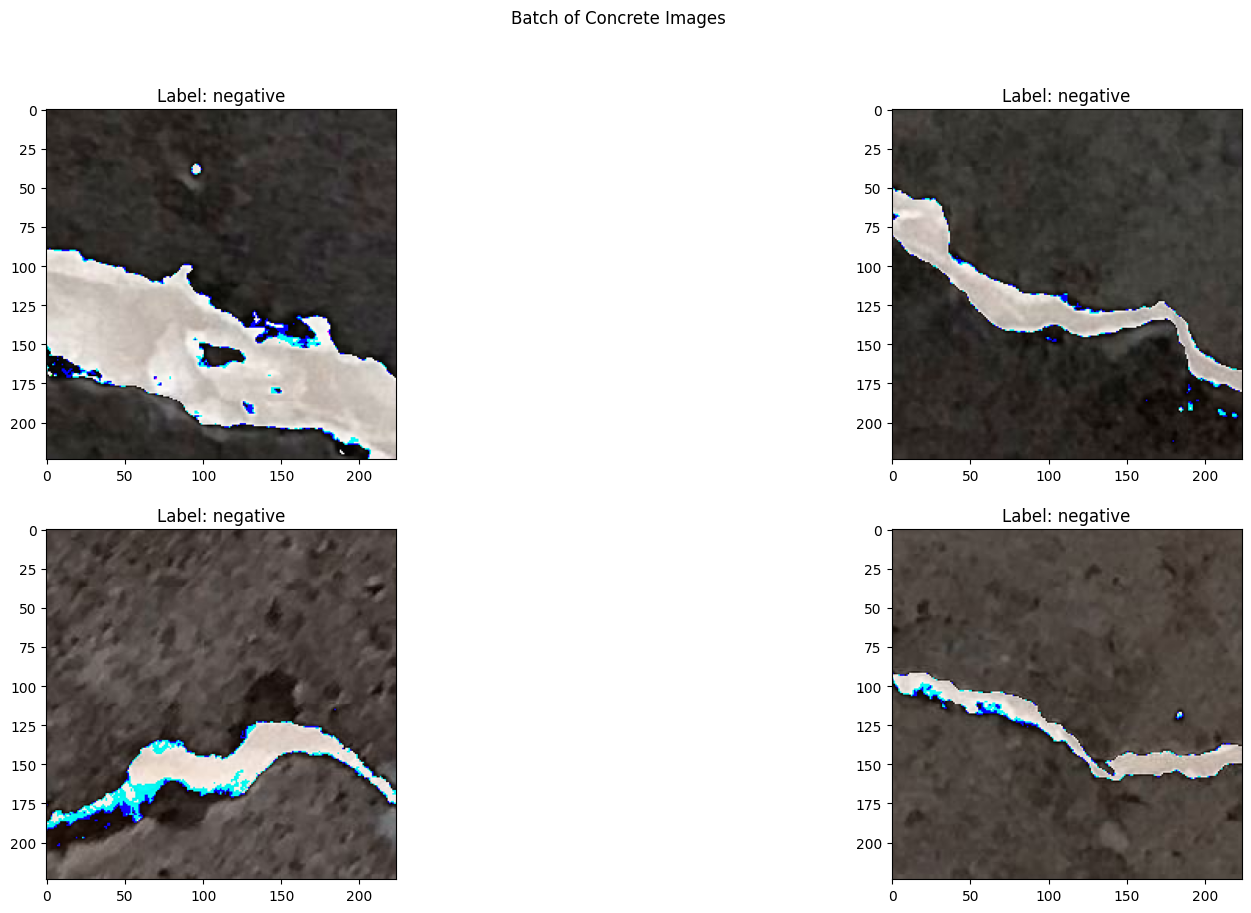

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1:
        image_data = batch_images[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ax2.set_title(f'Label: {predicted_labels[ind]}')
        ind += 1

fig.suptitle('Batch of Concrete Images')
plt.show()